Using the data of IBM storage of FuelConsumption and downloading it through !wget


In [1]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-05-23 16:36:07--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   126KB/s    in 0.6s    

2020-05-23 16:36:09 (126 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

Data Contains model specific fuel-consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada

In [3]:
# Reading the data
df = pd.read_csv("FuelConsumption.csv")
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
#using some features(columns) for which the model is based on
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


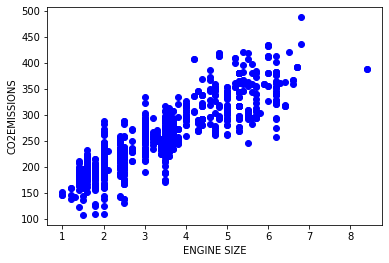

In [5]:
#plotting the Emission values with respect to  Engine Size
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='blue')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [7]:
#using the random generation for test and train from the data and storing it in mask for better predictions
mask = np.random.rand(len(df))<0.8
train = cdf[mask]
test = cdf[~mask]


In [9]:
train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267
9,2.4,4,10.6,7.5,9.2,212


In [10]:
test

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
10,2.4,4,11.2,8.1,9.8,225
14,4.7,8,17.4,11.3,14.7,338
34,4.0,8,14.7,9.7,12.5,288
39,3.0,6,12.9,9.2,11.2,258
44,4.2,8,17.6,11.0,14.6,336
47,5.2,10,21.1,13.8,17.8,409
49,4.2,8,21.2,13.4,17.7,407
60,4.0,8,14.2,9.7,12.2,281
67,2.0,4,11.5,8.8,10.3,237
73,6.0,12,20.0,12.2,16.5,380


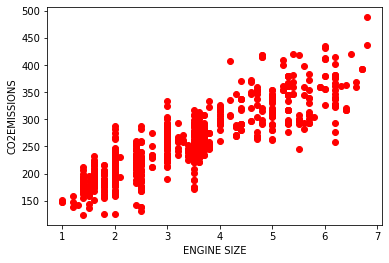

In [12]:
#Train data visualisation
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color= 'red')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [15]:
from sklearn import linear_model
regular = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regular.fit (x, y)
# The coefficients
print ('Coefficients: ', regular.coef_)

Coefficients:  [[11.31407097  7.48266518  9.19328959]]


In [16]:
x

array([[ 2. ,  4. ,  8.5],
       [ 2.4,  4. ,  9.6],
       [ 1.5,  4. ,  5.9],
       ...,
       [ 3. ,  6. , 11.8],
       [ 3.2,  6. , 11.3],
       [ 3.2,  6. , 12.8]])

In [17]:
y

array([[196],
       [221],
       [136],
       [255],
       [244],
       [230],
       [232],
       [255],
       [267],
       [212],
       [239],
       [359],
       [359],
       [354],
       [338],
       [354],
       [359],
       [202],
       [230],
       [214],
       [230],
       [230],
       [214],
       [235],
       [251],
       [224],
       [258],
       [224],
       [258],
       [260],
       [227],
       [258],
       [361],
       [230],
       [242],
       [239],
       [212],
       [246],
       [304],
       [294],
       [407],
       [354],
       [336],
       [354],
       [409],
       [306],
       [308],
       [290],
       [262],
       [285],
       [262],
       [285],
       [267],
       [281],
       [297],
       [292],
       [209],
       [209],
       [237],
       [297],
       [356],
       [320],
       [380],
       [322],
       [380],
       [437],
       [193],
       [202],
       [181],
       [181],
       [193],
      

 Predicting CO2EMISSION using FUELCONSUMPTION_COMB, ENGINESIZE and CYLINDERS of cars

Coefficient and Intercept , are the parameters of the fit line. Given that it is a multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function

In [18]:
#prediction 
y_predict= regular.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_predict - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regular.score(x, y))

Residual sum of squares: 619.93
Variance score: 0.87


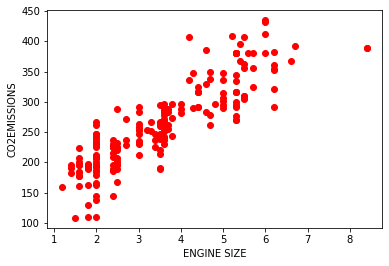

In [19]:
#Test data visualisation
plt.scatter(test.ENGINESIZE,test.CO2EMISSIONS,color= 'red')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [20]:
#using FUEL CONSUMPTION in CITY__ and __FUEL CONSUMPTION in HWY__ instead of FUELCONSUMPTION_COMB 
#to check if it is a better prediction
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
y_= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))


Coefficients:  [[11.32073917  7.2690496   5.63235244  3.39166592]]
Residual sum of squares: 618.14
Variance score: 0.87


Both the Analysis shows that Variance score is close to one , which shows that both are accurate with OLS more

In [26]:
y_


array([[215.84305887],
       [316.73087341],
       [288.17233894],
       [250.47943323],
       [311.17947454],
       [366.24821101],
       [339.59594152],
       [285.35616272],
       [215.37863508],
       [378.22064839],
       [202.06054897],
       [204.88285241],
       [239.87467985],
       [240.77708169],
       [246.1914927 ],
       [294.72950693],
       [294.72950693],
       [231.53512191],
       [305.21916237],
       [305.21916237],
       [305.21916237],
       [204.88285241],
       [248.4505609 ],
       [307.70229922],
       [205.67015631],
       [191.89482123],
       [211.53270463],
       [219.54535044],
       [201.4046295 ],
       [212.32613575],
       [209.97998676],
       [254.33447534],
       [214.69417467],
       [258.84648452],
       [214.57907673],
       [248.33546296],
       [258.84648452],
       [352.09305824],
       [383.22285795],
       [402.50633586],
       [259.17952388],
       [263.12829782],
       [262.55893535],
       [251